#### import necessary libraries 

In [1]:
import numpy as np
import os
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

#### create a CNN model

In [2]:
def create_cnn_model(input_shape=(224, 224, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#### to extract features

In [3]:
def extract_features(img_path, model):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        return features.flatten()
    except Exception as e:
        print(f"Warning: Unable to process image {img_path}. Error: {e}")
        return None

#### to recommend similar dresses

In [4]:
def recommend_similar_dresses(query_img_path, features_list, file_names, model, top_n=5):
    query_features = extract_features(query_img_path, model)
    
    similarities = cosine_similarity([query_features], features_list)
    
    similar_indices = similarities.argsort()[0][-top_n:][::-1]
    
    similar_dresses = [(file_names[i], similarities[0][i]) for i in similar_indices]
    return similar_dresses

#### loading features

In [5]:
features_file = 'dress_features_custom_cnn.pkl'
dataset_dir = r'C:\Users\RAMIZ\Desktop\Wahy\Notes\Project\women_fashion'  # Update with your dataset path
model = create_cnn_model()

if os.path.exists(features_file):
    with open(features_file, 'rb') as f:
        data = pickle.load(f)
        features_list = data['features']
        file_names = data['file_names']
else:
    features_list = []
    file_names = []
    
    for img_name in os.listdir(dataset_dir):
        img_path = os.path.join(dataset_dir, img_name)
        features = extract_features(img_path, model)
        if features is not None:
            features_list.append(features)
            file_names.append(img_name)
    
    with open(features_file, 'wb') as f:
        pickle.dump({'features': features_list, 'file_names': file_names}, f)

#### Usage

In [6]:
query_image_path = r'C:/Users/RAMIZ/Desktop/Wahy/Notes/Project/women_fashion/ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg'
similar_dresses = recommend_similar_dresses(query_image_path, features_list, file_names, model)

print('Recommended dresses:')
for dress, similarity in similar_dresses:
    print(f'Dress: {dress}, Similarity: {similarity:.2f}')

1/1 [==============================] - 0s 295ms/step
Recommended dresses:
Dress: long, elegant, teal dress with a high slit on one side.jpg, Similarity: 0.35
Dress: black top with spaghetti straps and a black skirt adorned with a fringe detail at the hem.jpg, Similarity: 0.34
Dress: black dress with sparkling details.jpg, Similarity: 0.33
Dress: beige top adorned with black dots and a green skirt.jpg, Similarity: 0.33
Dress: light brown sleeveless double-breasted blazer paired with matching straight-leg trousers.jpg, Similarity: 0.32


#### Display the query image and similar images

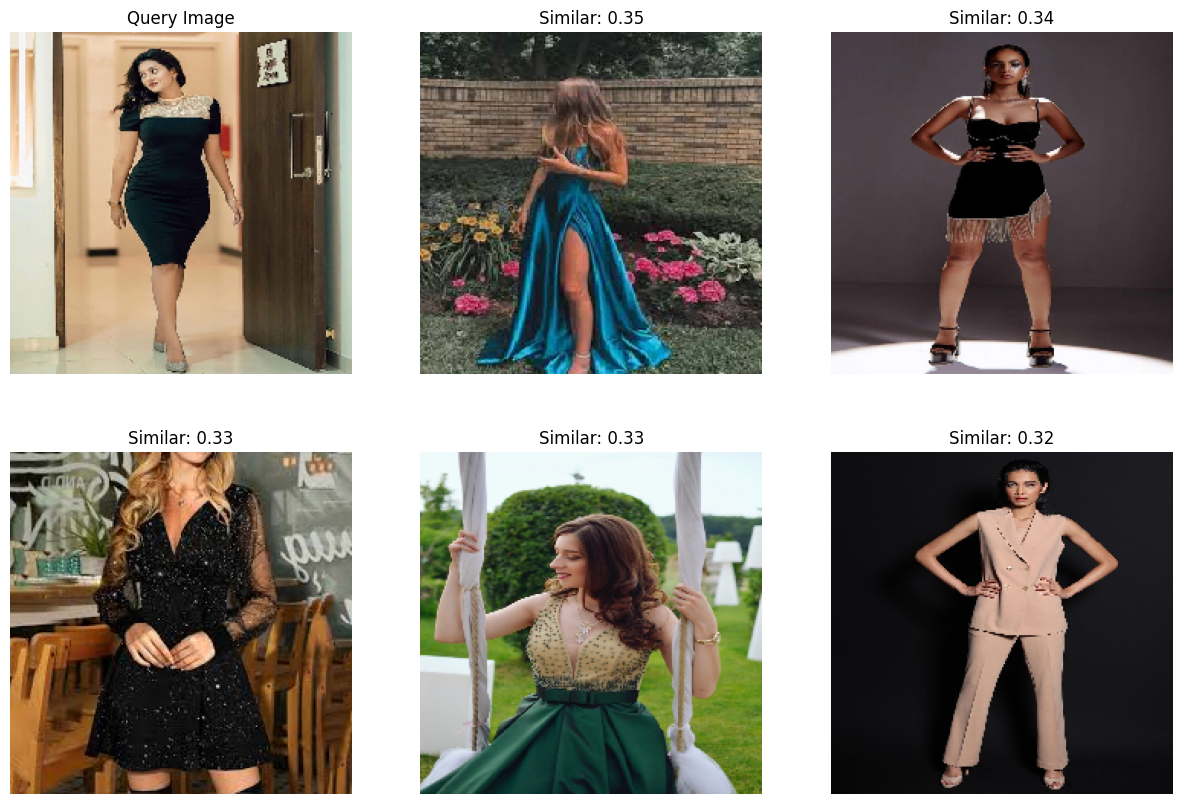

In [7]:
def display_images(query_image_path, similar_dresses, dataset_dir):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    query_img = image.load_img(query_image_path, target_size=(224, 224))
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.axis('off')
    
    for i, (img_name, similarity) in enumerate(similar_dresses):
        plt.subplot(2, 3, i+2)
        img_path = os.path.join(dataset_dir, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.title(f"Similar: {similarity:.2f}")
        plt.axis('off')
    
    plt.show()

display_images(query_image_path, similar_dresses, dataset_dir)


